## Przedstawienie wyników różnych algorytmów poleceń dla wybranego użytkownika

In [2]:
import pandas as pd
import clustering as cl
import knn as knn_alg
import factorization as mf
import matplotlib.pyplot as plt

In [3]:
# Import datasetu
movies = pd.read_csv('data/movie.csv')
ratings = pd.read_csv('data/rating.csv')
genome = pd.read_csv('data/genome_tags.csv')

In [10]:
# wybór użytkownika, dla którego będziemy polecać filmy, oraz ile filmów chcemy wyświetlić
user_id = 23
number_of_movies = 10

## Metoda klasteryzacji algorytmem k-średnich

In [11]:
# Tworzenie klastrów może zająć do około minuty
RS = cl.SystemRekomendacji(ratings, movies)
RS.prepare_clusters()

Termination criterion satisfied


True

In [15]:
recommended_movies = RS.recommend_movies(number_of_movies, user_id)
recommended_movies

,title
0,"Godfather, The (1972)"
1,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)
2,Paths of Glory (1957)
3,Casablanca (1942)
4,Rear Window (1954)
5,"Third Man, The (1949)"
6,"Godfather: Part II, The (1974)"
7,12 Angry Men (1957)
8,City Lights (1931)
9,Schindler's List (1993)


## KNN - k Nearest Neighbors

In [16]:
movie_details_df = pd.DataFrame(columns=['movieId', 'title', 'genres'])
movie_recommender = knn_alg.MovieRecommender(movies, ratings)
movie_ids_list = movie_recommender.recommend_movies(user_id, number_of_movies, False)

rows_to_append = []
for arr in movie_ids_list:
    for movie_id in arr:
        movie_row = movies[movies['movieId'] == movie_id]
        if not movie_row.empty:
            rows_to_append.append(movie_row.iloc[0])

if rows_to_append:
    movie_details_df = pd.concat([movie_details_df, pd.DataFrame(rows_to_append)], ignore_index=True)

movie_details_df

Maximum rating for user 23 : 5.0
Movies with the maximum rating: [32, 47, 50, 223, 293, 296, 318, 508, 527, 535, 555, 608, 678, 778, 1047, 1059, 1060, 1089, 1095, 1111, 1188, 1249, 1358, 1500, 1527, 1580, 1584, 1617, 1653, 1704, 1754, 1805, 1833, 1835, 1909, 2006, 2028, 2058, 2294, 2324, 2952]


,movieId,title,genres
0,780,Independence Day (a.k.a. ID4) (1996),Action|Adventure|Sci-Fi|Thriller
1,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
2,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller
3,648,Mission: Impossible (1996),Action|Adventure|Mystery|Thriller
4,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Sci-Fi
5,541,Blade Runner (1982),Action|Sci-Fi|Thriller
6,1240,"Terminator, The (1984)",Action|Sci-Fi|Thriller
7,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller
8,1214,Alien (1979),Horror|Sci-Fi
9,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi


## Matrix factorization

In [23]:
number_of_ratings = 1000000
matrix_factorization = mf.MatrixFactorization(ratings.head(number_of_ratings), 1, 5, movies, 20, genome.shape[0])
mf_recomended_movies = matrix_factorization.get_recomendations(user_id, number_of_movies)

mf_movie_details_df = pd.DataFrame(columns=['movieId', 'title', 'genres'])
movie_ids_list = [item[0] for item in mf_recomended_movies]

rows_to_append = []
for movie_id in movie_ids_list:
    movie_row = movies[movies['movieId'] == movie_id]
    if not movie_row.empty:
        rows_to_append.append(movie_row.iloc[0])

if rows_to_append:
    mf_movie_details_df = pd.concat([mf_movie_details_df, pd.DataFrame(rows_to_append)], ignore_index=True)

mf_movie_details_df

,movieId,title,genres
0,583,Dear Diary (Caro Diario) (1994),Comedy|Drama
1,1000,Curdled (1996),Crime
2,941,"Mark of Zorro, The (1940)",Adventure
3,783,"Hunchback of Notre Dame, The (1996)",Animation|Children|Drama|Musical|Romance
4,1524,"Turning, The (1992)",Drama
5,1179,"Grifters, The (1990)",Crime|Drama|Film-Noir
6,190,Safe (1995),Thriller
7,1830,Follow the Bitch (1996),Comedy
8,143,Gospa (1995),Drama
9,1431,Beverly Hills Ninja (1997),Action|Comedy


### RMSE dla matrix factorization

In [ ]:
# Listy do trzymania numerów epok oraz wartości RMSE
epochs = []
rmse_values = []
number_of_epochs = 30
number_of_ratings = 1000000

# Tworzenie modeli dla kolejnych liczb epok
for n_epochs in range(1, number_of_epochs + 1):
    # Utworzenie modelu
    matrix_factorization = mf.MatrixFactorization(ratings.head(number_of_ratings), 1, 5, movies, n_epochs, genome.shape[0])

    # Wyznaczenie RMSE
    rmse = matrix_factorization.get_rmse()

    # Dodanie RMSE i numeru epoki do listy wartości
    epochs.append(n_epochs)
    rmse_values.append(rmse)

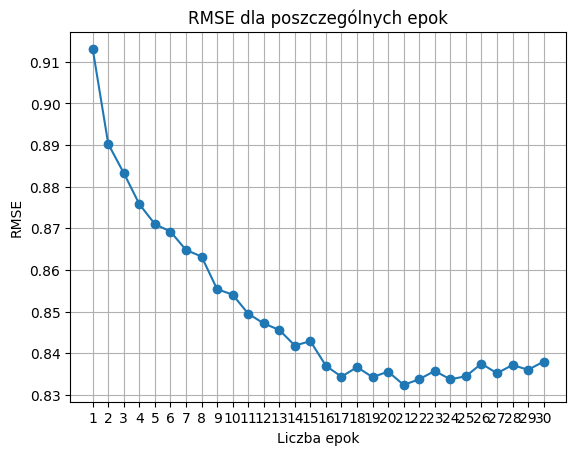

In [33]:
# Utworzenie wykresu
plt.plot(epochs, rmse_values, marker='o')
plt.title('RMSE dla poszczególnych epok')
plt.xlabel('Liczba epok')
plt.ylabel('RMSE')
plt.xticks(range(1, number_of_epochs + 1, 1))
plt.grid(True)
plt.show()

## Porównanie zwróconych wyników

In [17]:
import matplotlib.pyplot as plt
def genre_graph_plot(recommended_movies):
    # Łączymy ramki danych na podstawie tytułów filmów
    merged_df = pd.merge(movies, recommended_movies, on='title', how='inner')

    # Grupujemy po gatunkach i liczymy wystąpienia każdego gatunku
    genres_counts = movies[movies['title'].isin(merged_df['title'])]['genres'].str.split('|', expand=True).stack().value_counts()

    # Tworzymy wykres słupkowy
    plt.figure(figsize=(10, 6))
    plt.bar(genres_counts.keys(), genres_counts.values, color='skyblue')
    plt.xlabel('Gatunki filmów')
    plt.ylabel('Liczba wystąpień')
    plt.title('Najczęściej występujące gatunki filmów')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

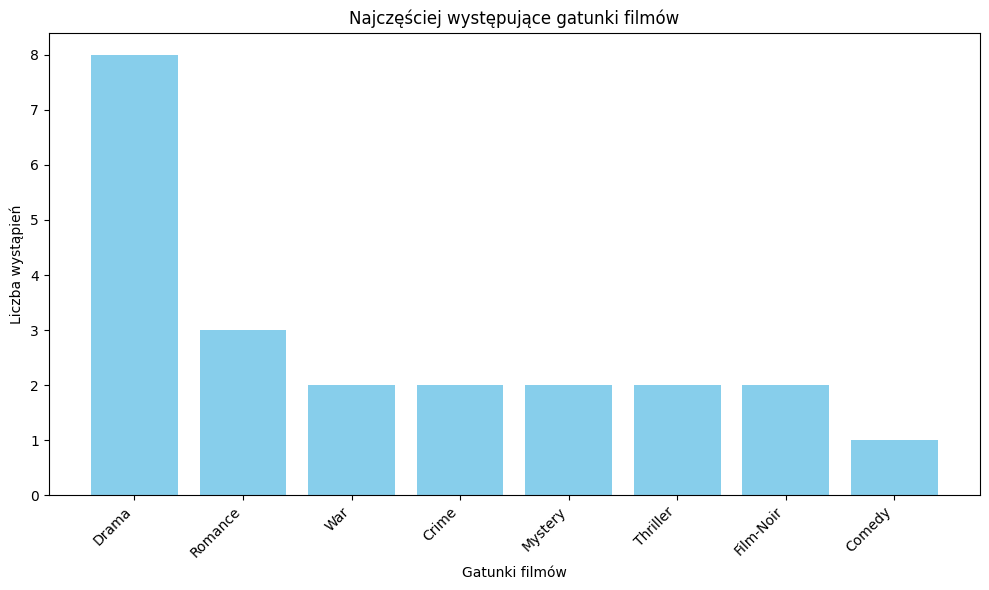

In [18]:
genre_graph_plot(recommended_movies)

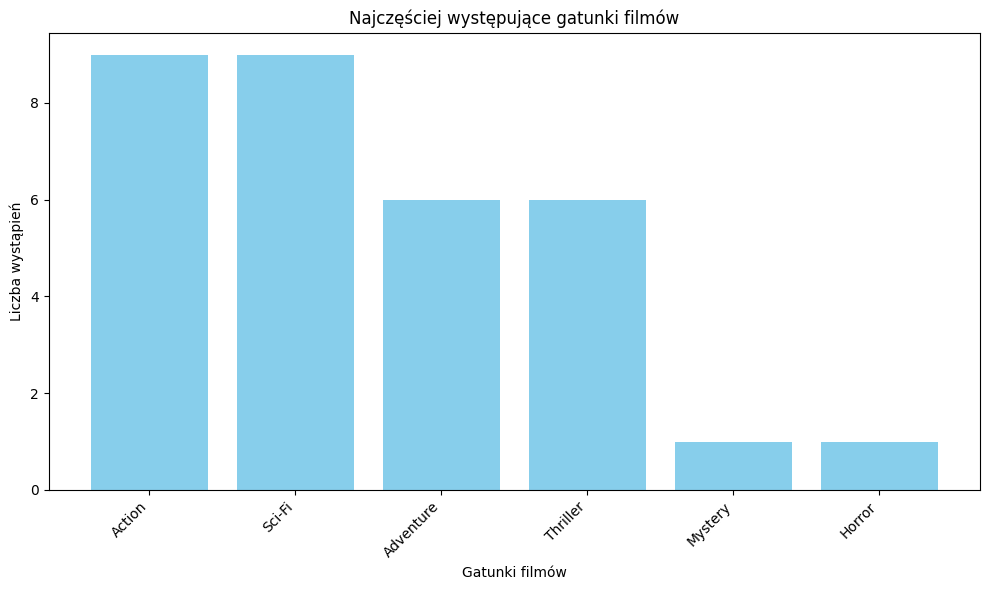

In [19]:
genre_graph_plot(movie_details_df)

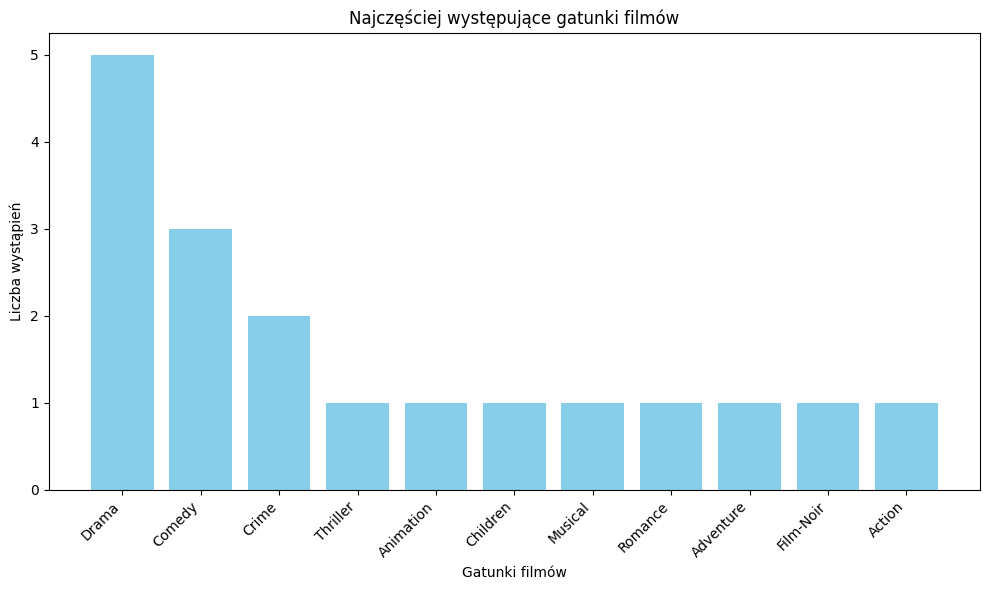

In [24]:
genre_graph_plot(mf_movie_details_df)